<a href="https://colab.research.google.com/github/inhamjchoi/SafetyDataClass/blob/main/Ex03_2_Classification_HeartData_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold # Added for Cross Validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Load data
df = pd.read_csv('Ex03_2_heartData.csv')
X = pd.get_dummies(df.drop(columns=['HeartDisease']), drop_first=True)
y = df['HeartDisease']
print(f"Total observations: {len(df)}")

Total observations: 427


In [ ]:
# Define model
model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Accuracy (cross-validated)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print(f"Cross-Validated Accuracy Scores (5-Fold): {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-Validated Accuracy Scores (5-Fold): [0.70930233 0.63953488 0.71764706 0.56470588 0.83529412]
Mean Accuracy: 0.6933 (+/- 0.0899)


In [ ]:
# Predictions from CV
y_pred = cross_val_predict(model, X, y, cv=cv)

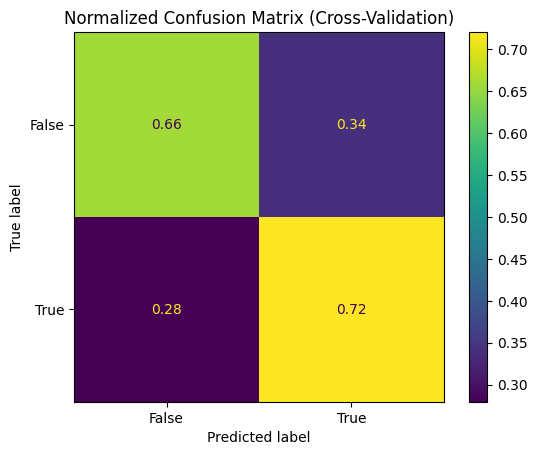

In [ ]:
# Confusion matrix (normalized)
cm = confusion_matrix(y, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot()
disp.ax_.set_title("Normalized Confusion Matrix (Cross-Validation)")
plt.show()